In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures

In [2]:
data = pd.read_csv('data/data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

In [6]:
data.sub_area.values,data.ecology.values

(array(['Bibirevo', 'Nagatinskij Zaton', "Tekstil'shhiki", ...,
        'Poselenie Vnukovskoe', 'Obruchevskoe', 'Novogireevo'],
       dtype=object),
 array(['good', 'excellent', 'poor', ..., 'no data', 'satisfactory',
        'poor'], dtype=object))

In [8]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 4],
                          [0, 1, 2]], columns=['one', 'two', 'three'])

В данных часто бывают пропуски, в Pandas их можно найти с помощью метода .isna():

In [9]:
test_data.isna()

,one,two,three
0,False,False,True
1,False,True,False
2,False,False,False


Столбцы или строки с пропусками мы можем удалить с помощью метода .dropna(). При axis=0 удаляются строки, при 1 — столбцы, по умолчанию значение равно 0:

In [ ]:
test_data.dropna(axis=0)

Удаление строк и столбцов — грубое решение, из-за этого можно случайно убрать нужные данные. Поэтому лучше заменять пропуски статистиками или константным значением с помощью метода fillna():

In [ ]:
test_data.fillna(-1)

Какими статистиками можно заменить пропуски:

* среднее значение * np.mean();
* максимальное значение * np.max();
* минимальное значение * np.min();
* медиана * np.median().
* Для удобства некоторые методы можно вызвать прямо у столбцов.

In [10]:
vis_data = pd.read_csv("data/train.csv", encoding = 'ISO-8859-1', low_memory = False)

In [12]:
vis_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 34 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   violation_zip_code          0 non-null       float64
 7   mailing_address_str_number  246704 non-null  float64
 8   mailing_address_str_name    250302 non-null  object 
 9   city                        250306 non-null  object 
 10  state                       250213 non-null  object 
 11  zip_code                    250305 non-null  object 
 12  non_us_str_code             3 non-null       object 
 13  country       

In [36]:
vis_data = pd.read_csv("data/train.csv", encoding = 'ISO-8859-1', low_memory = False)
y=vis_data.state.value_counts().index[0]
result=vis_data.state.fillna(y)
result.isna()


0         False
1         False
2         False
3         False
4         False
          ...  
250301    False
250302    False
250303    False
250304    False
250305    False
Name: state, Length: 250306, dtype: bool

In [19]:
# result = vis_data.state.mode
# # result = vis_data.state.mode
# vis_data.state.fillna(vis_data.state.mode)
# vis_data.state.value_counts().index[0]

'MI'

In [43]:
vis_data = pd.read_csv("data/train.csv", encoding = 'ISO-8859-1', low_memory = False)


In [44]:
data.dropna()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452
6,7,25,14.0,10.0,Sokol'niki,933.0,5,5050.0,5,0,...,0.513689,0.067725,0.273019,0.516979,0.822377,0.318230,0.752223,2.969315,poor,5500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30461,30466,56,29.0,13.0,Severnoe Tushino,4116.0,5,9891.0,5,0,...,0.232778,1.491458,0.648281,0.193474,0.283044,2.040548,23.720332,12.198090,satisfactory,12000000
30462,30467,56,51.0,19.0,Sviblovo,2057.0,1,3741.0,2,0,...,0.187828,0.969990,0.510751,0.566309,1.261711,0.532268,3.672399,2.988268,poor,10262010
30465,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.540003,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,25000000
30467,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.108672,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,13500000


In [50]:
vis_data.state.isna().value_counts()

False    250213
True         93
Name: state, dtype: int64

In [63]:
vis_data = pd.read_csv("data/train.csv", encoding = 'ISO-8859-1', low_memory = False)
result = vis_data.state.mode
vis_data.state.fillna(result,inplace=True),vis_data.state.value_counts().index[0],vis_data.state.isna().value_counts()

(None,
 'MI',
 False    250306
 Name: state, dtype: int64)

In [76]:
vis_data = pd.read_csv("data/train.csv", encoding = 'ISO-8859-1', low_memory = False)
x=vis_data.state.value_counts().index[0]
result=vis_data.state.fillna(x)
result

0         IL
1         MI
2         MI
3         MI
4         MI
          ..
250301    MI
250302    MI
250303    MI
250304    MI
250305    MI
Name: state, Length: 250306, dtype: object

In [68]:
result

In [77]:
data.dropna()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452
6,7,25,14.0,10.0,Sokol'niki,933.0,5,5050.0,5,0,...,0.513689,0.067725,0.273019,0.516979,0.822377,0.318230,0.752223,2.969315,poor,5500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30461,30466,56,29.0,13.0,Severnoe Tushino,4116.0,5,9891.0,5,0,...,0.232778,1.491458,0.648281,0.193474,0.283044,2.040548,23.720332,12.198090,satisfactory,12000000
30462,30467,56,51.0,19.0,Sviblovo,2057.0,1,3741.0,2,0,...,0.187828,0.969990,0.510751,0.566309,1.261711,0.532268,3.672399,2.988268,poor,10262010
30465,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0.540003,0.069986,0.086552,0.362681,0.850385,0.310021,0.778428,1.450108,poor,25000000
30467,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,1.108672,1.204798,1.340017,0.130667,1.644053,0.476021,2.088193,4.119706,satisfactory,13500000


In [110]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
# scaled = scaler.fit_transform(vis_data.balance_due.values.reshape((-1,1)))
scaled = scaler.fit_transform(vis_data.balance_due.values.reshape((-1,1)))

round(scaled.min(),5)

-13.14733

In [111]:
vis_data = pd.read_csv("./data/train.csv", encoding = 'ISO-8859-1', low_memory = False)
print(vis_data.balance_due.head())
normalized = np.sqrt(vis_data.balance_due[vis_data.balance_due > 0])
print(normalized.head())
normalized.median() - normalized.mean()

0    305.0
1     75.0
2      0.0
3      0.0
4      0.0
Name: balance_due, dtype: float64
0    17.464249
1     8.660254
5    17.464249
6    29.240383
7    11.832160
Name: balance_due, dtype: float64


0.4525960609393067

In [112]:
normalized.median()


17.46424919657298

In [113]:
normalized.mean()

17.011653135633672

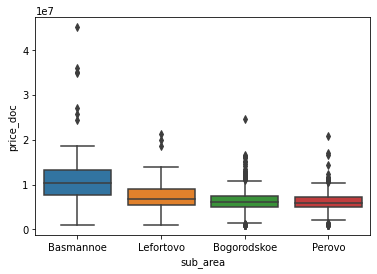

In [116]:
X = data[data.sub_area.isin(['Basmannoe', 'Lefortovo', 'Perovo', 'Bogorodskoe'])]
X.head()

sns.boxplot(x='sub_area', y='price_doc', data=X)

In [117]:
import numpy as np
import pandas as pd
%matplotlib inline

vis_data = pd.read_csv("./data/train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("./data/latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

In [118]:
from sklearn.preprocessing import PolynomialFeatures

pf = PolynomialFeatures(2)
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])
poly_features
poly_features.shape

(250306, 6)

In [119]:
pd.get_dummies(vis_data.state).shape

(250306, 59)

In [120]:
pf = PolynomialFeatures(3)
poly_features = pf.fit_transform(vis_data[['balance_due', 'discount_amount']])
poly_df = pd.DataFrame(poly_features)
print(poly_df)

          0      1    2        3    4    5           6    7    8    9
0       1.0  305.0  0.0  93025.0  0.0  0.0  28372625.0  0.0  0.0  0.0
1       1.0   75.0  0.0   5625.0  0.0  0.0    421875.0  0.0  0.0  0.0
2       1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
3       1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
4       1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
...     ...    ...  ...      ...  ...  ...         ...  ...  ...  ...
250301  1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
250302  1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
250303  1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
250304  1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0
250305  1.0    0.0  0.0      0.0  0.0  0.0         0.0  0.0  0.0  0.0

[250306 rows x 10 columns]


In [126]:
poly_df.mean().sort_values(ascending=False)



6    2.042001e+09
3    4.171958e+05
7    1.179244e+05
9    3.074176e+03
1    2.224491e+02
5    1.178174e+01
0    1.000000e+00
2    1.251668e-01
4   -9.855317e+00
8   -1.495641e+02
dtype: float64

In [127]:
vis_data.info()
weekdays = pd.to_datetime(vis_data.ticket_issued_date.dropna())
weekdays.loc[weekdays.dt.weekday > 4]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250306 entries, 0 to 250305
Data columns (total 35 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   ticket_id                   250306 non-null  int64  
 1   agency_name                 250306 non-null  object 
 2   inspector_name              250306 non-null  object 
 3   violator_name               250272 non-null  object 
 4   violation_street_number     250306 non-null  float64
 5   violation_street_name       250306 non-null  object 
 6   mailing_address_str_number  246704 non-null  float64
 7   mailing_address_str_name    250302 non-null  object 
 8   city                        250306 non-null  object 
 9   state                       250213 non-null  object 
 10  zip_code                    250305 non-null  object 
 11  non_us_str_code             3 non-null       object 
 12  country                     250306 non-null  object 
 13  ticket_issued_

5        2004-05-01 11:50:00
24       2004-11-13 15:30:00
25       2004-11-13 15:30:00
26       2005-01-01 11:00:00
2078     2005-02-05 13:25:00
                 ...        
250260   2011-12-24 11:30:00
250261   2011-12-24 11:30:00
250262   2011-12-24 11:30:00
250263   2011-12-24 11:30:00
250295   2011-12-31 16:15:00
Name: ticket_issued_date, Length: 1620, dtype: datetime64[ns]

In [130]:
print(data.ecology.value_counts())
ecology_dict = { 'no data': 0, 'poor': 1, 'satisfactory': 2, 'good': 3, 'excellent': 4 }
display(data.head())
data.ecology = data.ecology.replace(to_replace=ecology_dict)

poor            8017
no data         7656
good            7173
excellent       3938
satisfactory    3685
Name: ecology, dtype: int64


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [131]:
display(data.head())
data.ecology.mean()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,3,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,4,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,1,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,3,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,4,16331452


1.7282483836030063

In [134]:
print(data.sub_area.value_counts())

dummies = pd.get_dummies(data.sub_area)
display(area_dummies.head())
data.join(dummies)

Poselenie Sosenskoe               1776
Nekrasovka                        1611
Poselenie Vnukovskoe              1372
Poselenie Moskovskij               925
Poselenie Voskresenskoe            713
                                  ... 
Molzhaninovskoe                      3
Poselenie Kievskij                   2
Poselenie Shhapovskoe                2
Poselenie Klenovskoe                 1
Poselenie Mihajlovo-Jarcevskoe       1
Name: sub_area, Length: 146, dtype: int64


,Ajeroport,Akademicheskoe,Alekseevskoe,Altuf'evskoe,Arbat,Babushkinskoe,Basmannoe,Begovoe,Beskudnikovskoe,Bibirevo,...,Vnukovo,Vojkovskoe,Vostochnoe,Vostochnoe Degunino,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,Vnukovo,Vojkovskoe,Vostochnoe,Vostochnoe Degunino,Vostochnoe Izmajlovo,Vyhino-Zhulebino,Zamoskvorech'e,Zapadnoe Degunino,Zjablikovo,Zjuzino
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0,0,0,0,0,0,0,0,0,0
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0,0,0,0,0,0,0,0,0,0
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,0,0,0,0,0,0,0,0,0,0
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0,0,0,0,0,0,0,0,0,0
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30464,30469,44,27.0,7.0,Otradnoe,5088.0,4,12721.0,4,0,...,0,0,0,0,0,0,0,0,0,0
30465,30470,86,59.0,3.0,Tverskoe,1874.0,4,6772.0,4,1,...,0,0,0,0,0,0,0,0,0,0
30466,30471,45,NaN,10.0,Poselenie Vnukovskoe,NaN,0,NaN,0,0,...,0,0,0,0,0,0,0,0,0,0
30467,30472,64,32.0,5.0,Obruchevskoe,2372.0,6,6083.0,8,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
def outliers_iqr(ys):
    quartile_1, quartile_3 = np.percentile(ys, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (iqr * 1.5)
    upper_bound = quartile_3 + (iqr * 1.5)
    return np.where((ys > upper_bound) | (ys < lower_bound))[0]    

vis_data = pd.read_csv("./data/train.csv", encoding = 'ISO-8859-1', low_memory = False)

o = outliers_iqr(vis_data.balance_due.dropna())
balance = vis_data.iloc[o].balance_due
np.max(balance) - np.min(balance)


# outliers = outliers_iqr(vis_data.balance_due.dropna())
# np.max(outliers) - np.min(outliers)

18780.0